## Практическая работа

В этой работе вам нужно будет подготовить финальный нотбук по задаче предсказания стоимости поддержанного автомобиля, которую мы решали на протяжении нескольких модулей.
<br>
*Обязательные задачи* помогут проверить, что вы действительно усвоили материал. Если у вас всё получилось, можете переходить к следующей теме.
<br>
Удачи!

Цели практической работы:

1.   Потренироваться в формировании понятного и структурированного ноутбука по результатам исследования.
2.   Отработать выбор наилучшей предсказательной модели с помощью кросс-валидации.
3.   На основе результатов метрик научиться делать выводы о переобучении/недообучении модели.
4.   Научиться сохранять обученные модели в формате `pickle`.




Что оценивается:

*   Ноутбук состоит из блоков: каждый блок соответствует определённой фазе работы с задачей.
*   Блоки, которые состоят из нескольких этапов, декомпозированы на подблоки (например, в `Data Preparation` может быть несколько подблоков: `Data cleaning`, `Feature Selection` и тому подобное).
*   Код написан в едином стиле и не нарушает PEP-8.
*   Код покрыт комментариями.
*   Код воспроизводим (то есть проверяющий, запустив ноутбук, получит ровно такие же результаты).
*   Все условия задач выполнены.





## Обязательные задачи

### Постановка общей задачи:



Напомним, что вы работаете с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах. На этих данных вам нужно построить модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

### Описание датасета:



- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены;
- `date`: дата публикации.

###  Задачи:

Ниже представлены задачи по проекту построения модели. Выполните их и в отдельном файле соберите финальный ноутбук проекта.

0. *Импорт сторонних библиотек*

В первой ячейке ноутбука импортируйте библиотеки, которые необходимы для работы с данными. Впоследствии все импорты добавляйте в эту ячейку. Структурируйте их по PEP-8.

[Документация по оформлению import'ов (PEP-8)](https://peps.python.org/pep-0008/#imports)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import missingno as msno
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.neural_network import MLPClassifier

1. *Загрузка данных*

Загрузите данные из файла `df_out`. Выведите размерность и первые 5 строчек данных.

In [2]:
df_out = pd.read_csv("28.6 df_out.csv")
df_out.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


2. *Data Preparation*

Объявите блок Data Preparation. В этом блоке:
* произведите преобразование типов данных, если нужно;
* исследуйте данные на пропуски, обработайте их (например, заполните какими-то значениями);
* избавьтесь от аномалий, если нужно.

В решении данной задачи опирайтесь на результаты работы в 17-19 модулях блока Data Preparation. Исследование данных подкрепляйте соответствующей визуализацией в виде графиков, таблиц или статистических значений.

Декомпозируйте блок на подблоки.


### *Исследуем данные на дубликаты*


In [3]:
display(df_out[df_out.duplicated()])
print("Дубликаты отсутвуют")

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date


Дубликаты отсутвуют


### Изменим типы данных.

In [4]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   

In [5]:
df_out.year = df_out.year.astype('Int32')
df_out.date = pd.to_datetime(df_out['date']).dt.normalize()
df_out.posting_date = pd.to_datetime(df_out.posting_date.apply(lambda x: str(x).split("T")[0])).dt.normalize()

In [6]:
df_out.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              10000 non-null  int64              
 1   url             10000 non-null  object             
 2   region          10000 non-null  object             
 3   region_url      10000 non-null  object             
 4   price           10000 non-null  int64              
 5   year            9964 non-null   Int32              
 6   manufacturer    10000 non-null  object             
 7   model           9872 non-null   object             
 8   fuel            9937 non-null   object             
 9   odometer        10000 non-null  int64              
 10  title_status    9834 non-null   object             
 11  transmission    9955 non-null   object             
 12  image_url       9998 non-null   object             
 13  description     9998 non-null   

### *Исследуем данные на  пропуски.*

In [7]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              10000 non-null  int64              
 1   url             10000 non-null  object             
 2   region          10000 non-null  object             
 3   region_url      10000 non-null  object             
 4   price           10000 non-null  int64              
 5   year            9964 non-null   Int32              
 6   manufacturer    10000 non-null  object             
 7   model           9872 non-null   object             
 8   fuel            9937 non-null   object             
 9   odometer        10000 non-null  int64              
 10  title_status    9834 non-null   object             
 11  transmission    9955 non-null   object             
 12  image_url       9998 non-null   object             
 13  description     9998 non-null   

<Axes: >

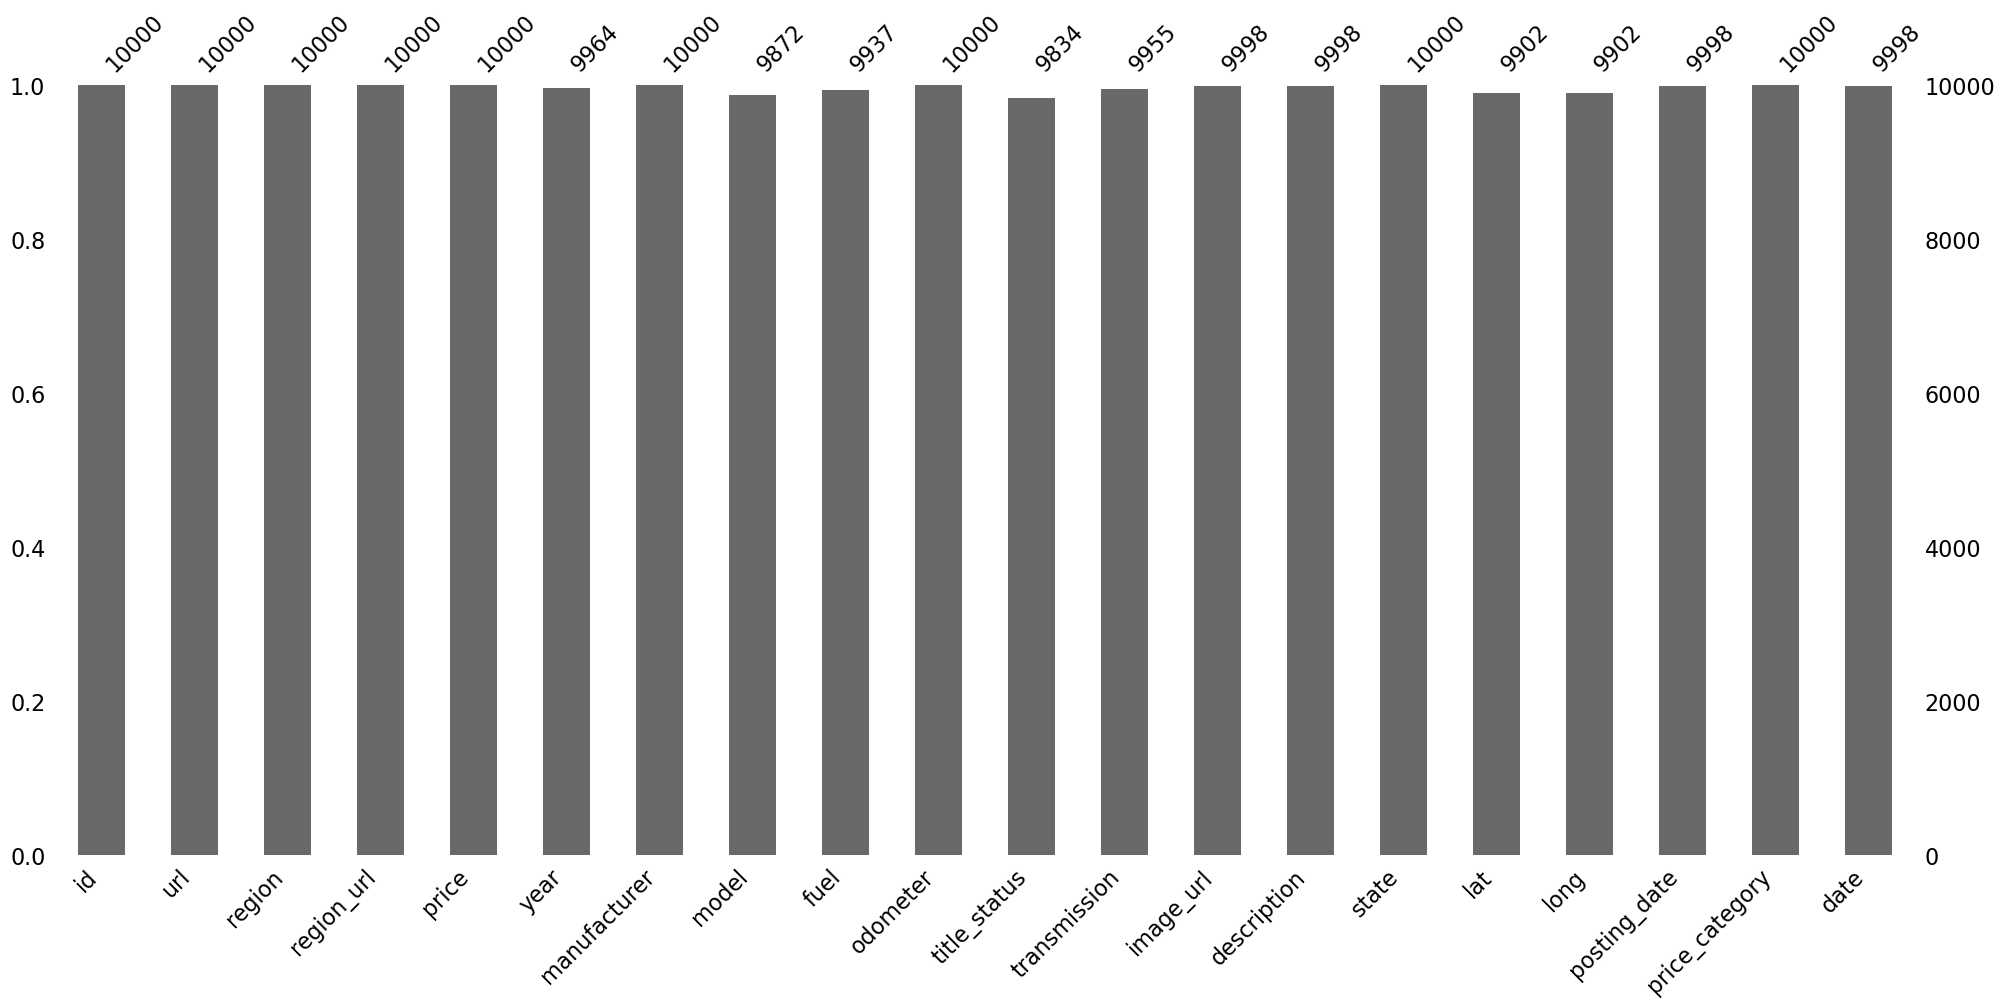

In [8]:
msno.bar(df_out)

In [9]:
missing_values = (df_out.isna().sum() / len(df_out) * 100).sort_values()
missing_values 

id                0.00
state             0.00
price_category    0.00
manufacturer      0.00
odometer          0.00
region_url        0.00
region            0.00
url               0.00
price             0.00
image_url         0.02
description       0.02
posting_date      0.02
date              0.02
year              0.36
transmission      0.45
fuel              0.63
lat               0.98
long              0.98
model             1.28
title_status      1.66
dtype: float64

Пропусков присутсвуют, но их довольно таки мало, поэтому сделаем следующие действия.
1) Пропуски в year заменим среднее значение.
2) title_status удалим строки с пропуском.
3) model удалим строки с пропуском.
4) transmission заменим на самое частое значение.
5) image_url удалим пустые.
6) date удалим пустые.
7) long удалим пустые.
8) lat удалим пустые.
9) description удалим пустые.
10) fuel заменим на самое частое значение.
11) posting_date удалим пустые.

In [10]:
# Удаление 
df_out = df_out.dropna(subset=['image_url', "date", "long", "lat","description", "posting_date", "model", "title_status"])

# Замена на среднее
df_out.year = df_out.year.fillna(int(df_out.year.mean()))
df_out.transmission = df_out.transmission.fillna(df_out.transmission.mode().values[0])
df_out.fuel = df_out.fuel.fillna(df_out.fuel.mode().values[0])

In [11]:
missing_values = (df_out.isna().sum() / len(df_out) * 100).sort_values()
missing_values 

id                0.0
posting_date      0.0
long              0.0
lat               0.0
state             0.0
description       0.0
image_url         0.0
transmission      0.0
title_status      0.0
odometer          0.0
fuel              0.0
model             0.0
manufacturer      0.0
year              0.0
price             0.0
region_url        0.0
region            0.0
url               0.0
price_category    0.0
date              0.0
dtype: float64

### Исследуем данные на аномалии.


In [12]:
from matplotlib.ticker import FormatStrFormatter

def box_plot(data, yname, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.boxplot(data)
    ax.set_ylabel(yname) 
    ax.set_title(title)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

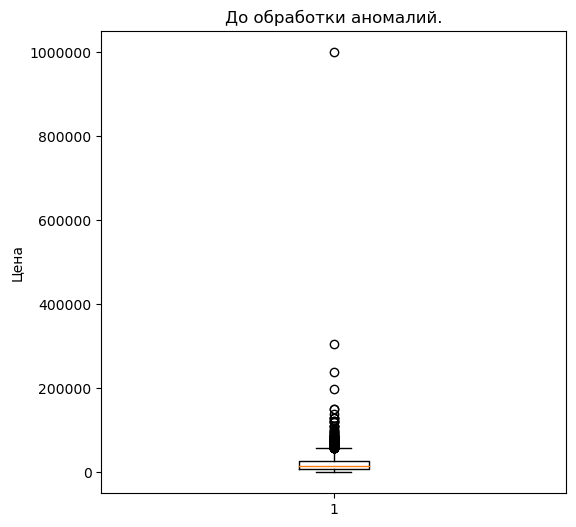

In [13]:
box_plot(df_out.price, "Цена", "До обработки аномалий.")

In [14]:
def find_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    return (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    

In [15]:
boundaries = find_outliers(df_out.price)
boundaries # Не забываем что цена не может быть отрицательная


(-22235.0, 58125.0)

In [16]:
is_boundaries = df_out.price <= boundaries[1] # Удалим выбросы
df_out = df_out.loc[is_boundaries]

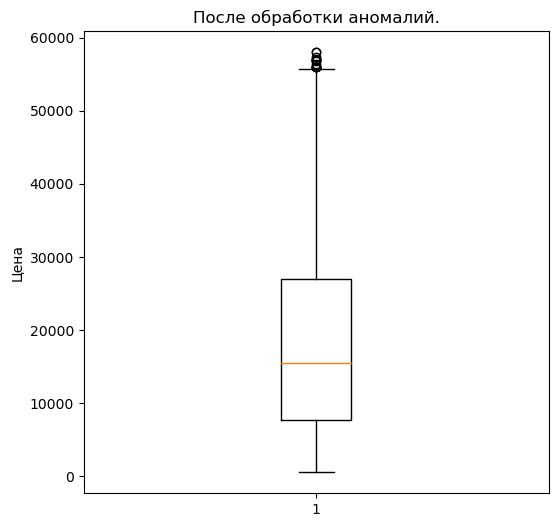

In [17]:
box_plot(df_out.price, "Цена", "После обработки аномалий.")

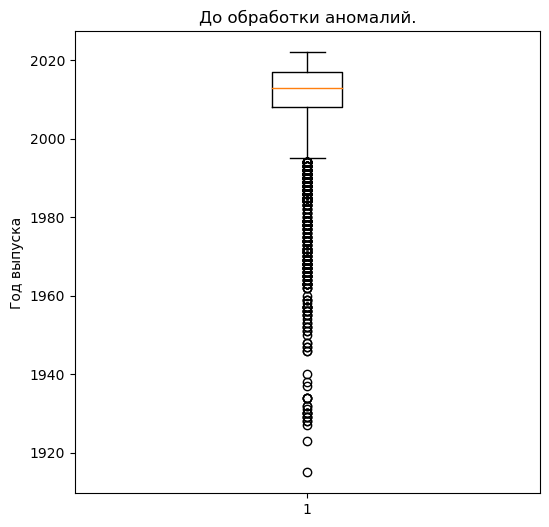

In [18]:
box_plot(df_out.year, 'Год выпуска', "До обработки аномалий.")


In [19]:
boundaries_year = find_outliers(df_out.year)
boundaries_year

(1994.5, 2030.5)

In [20]:
is_outliner_year = (df_out.year < boundaries_year[0]) | (df_out.year > boundaries_year[1])
df_out = df_out[is_outliner_year == False] # Удалим выбросы

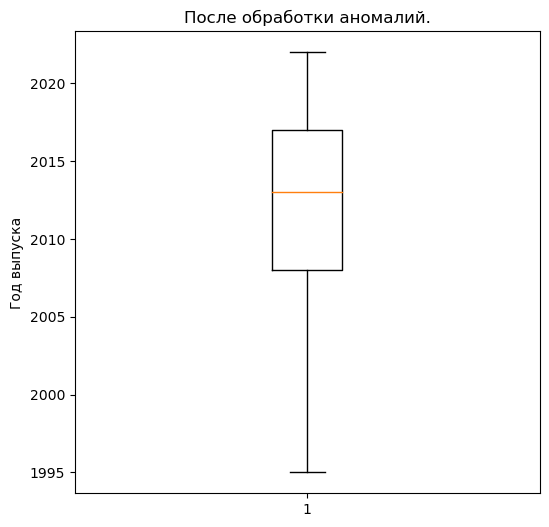

In [21]:
box_plot(df_out.year, 'Год выпуска', "После обработки аномалий.")


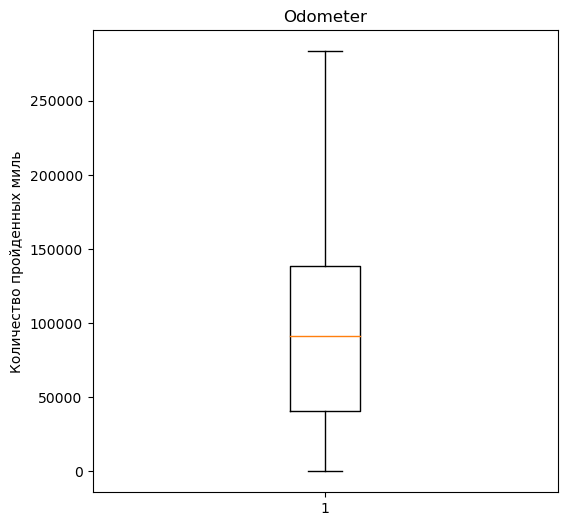

In [22]:
box_plot(df_out.odometer, 'Количество пройденных миль','Odometer')
# Аномалии отствуют.

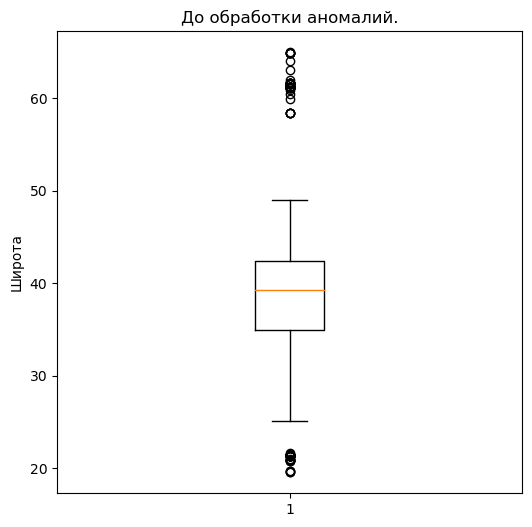

In [23]:
box_plot(df_out.lat, "Широта", "До обработки аномалий.")

In [24]:
boundaries_lat =find_outliers(df_out.lat)
boundaries_lat

(23.810354999999998, 53.480507)

In [25]:
is_outliner_lat = (df_out.lat < boundaries_lat[0]) | (df_out.lat > boundaries_lat[1])
df_out = df_out[is_outliner_lat == False] 

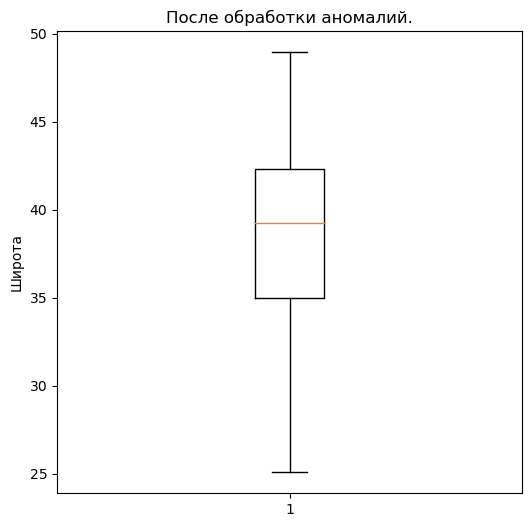

In [26]:
box_plot(df_out.lat, "Широта", "После обработки аномалий.")


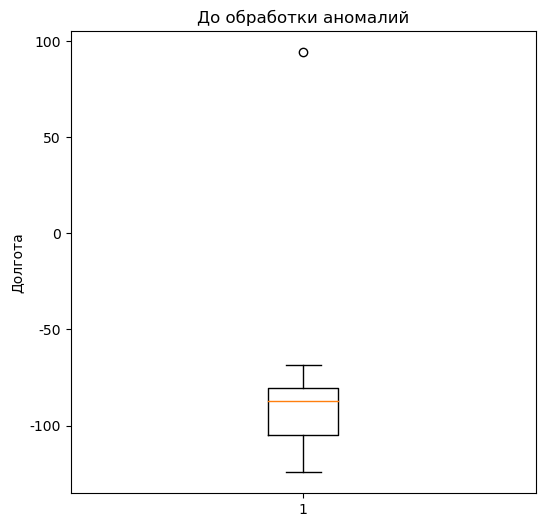

In [27]:
box_plot(df_out.long, "Долгота", "До обработки аномалий")


In [28]:
boundaries_long = find_outliers(df_out.long)
boundaries_long

(-142.107434, -43.41588999999999)

In [29]:
is_outliner_long = (df_out.long < boundaries_long[0]) | (df_out.long > boundaries_long[1])
df_out = df_out[is_outliner_long == False] 

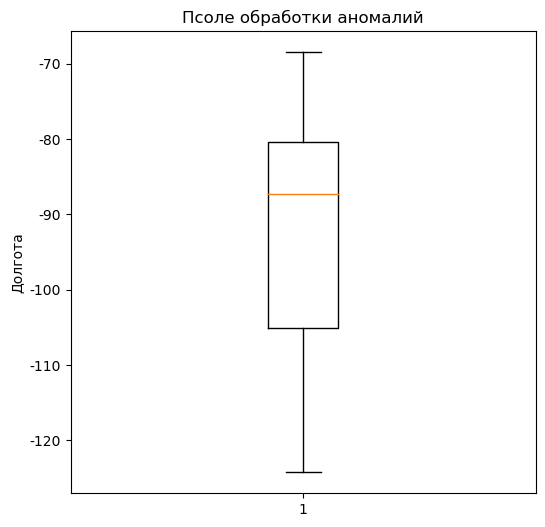

In [30]:
box_plot(df_out.long, "Долгота", "Псоле обработки аномалий")

3. *Feature engineering*

Объявите блок Feature engineering. В этом блоке:
* подготовьте категориальные переменные с помощью OneHotEncoder;
* стандартизируйте и нормализуйте переменные, если нужно;
* создайте новые признаки на основе информации в датафрейме (на основе дат, текстовых значений переменных, и так далее);
* удалите неинформативные колонки, которые появились в датасете в результате Feature engineering;
* сформируйте финальный датасет, на котором будет производиться моделирование, и сохраните его в отдельный файл.

В решении данной задачи опирайтесь на результаты работы в 20 модуле блока Data Preparation. Исследование подкрепляйте соответствующей визуализацией в виде графиков, таблиц или матриц корреляций, если это нужно.

Декомпозируйте блок на подблоки.

### Подготовка категориальных данных.

In [31]:
df_modern = df_out.copy() 

In [32]:
df_modern['short_model'] = df_modern.apply(lambda x: f'{x.model.split()[0]}', axis=1)

In [33]:
df_modern.region_url.apply(lambda x: x.split("://")[1].split('.')[0])

0        chattanooga
1          newjersey
2               reno
3       fayetteville
4            newyork
            ...     
9995      chautauqua
9996      binghamton
9997           salem
9998         madison
9999         norfolk
Name: region_url, Length: 8937, dtype: object

In [34]:
df_modern.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8937 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              8937 non-null   int64              
 1   url             8937 non-null   object             
 2   region          8937 non-null   object             
 3   region_url      8937 non-null   object             
 4   price           8937 non-null   int64              
 5   year            8937 non-null   Int32              
 6   manufacturer    8937 non-null   object             
 7   model           8937 non-null   object             
 8   fuel            8937 non-null   object             
 9   odometer        8937 non-null   int64              
 10  title_status    8937 non-null   object             
 11  transmission    8937 non-null   object             
 12  image_url       8937 non-null   object             
 13  description     8937 non-null   object

In [35]:
# Функция для преобразования категориальных переменных
def ohe_transformation(df, column):
    from sklearn.preprocessing import OneHotEncoder    
    ohe = OneHotEncoder(sparse=False)
    ohe.fit(df[[column]])
    ohe_matrix = ohe.transform(df[[column]])
    df[ohe.get_feature_names_out()] = ohe_matrix
    return df

In [36]:
# Преобразуем с помощью OHE следующие столбцы.
columns = ['region', 'manufacturer', 'state', 'fuel', 'transmission', 'title_status', 'short_model']
for column in columns:
    df_modern = ohe_transformation(df_modern, column)

c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\lorex\AppData\Local\Temp\ipykernel_19056\1149239770.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe_matrix
C:\Users\lorex\AppData\Local\Temp\ipykernel_19056\1149239770.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `

C:\Users\lorex\AppData\Local\Temp\ipykernel_19056\1149239770.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe_matrix
C:\Users\lorex\AppData\Local\Temp\ipykernel_19056\1149239770.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe_matrix
C:\Users\lorex\AppData\Local\Temp\ipykernel_19056\1149239770.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

In [37]:
df_modern.shape

(8937, 1336)

### Создадим новые признаки.

In [38]:
# Функция для построения гистрограмм.
def create_hist(df, column, xlabel, title, n):
    colors = {'medium': "orange", "high": "red", "low": "blue"}
    fig, ax = plt.subplots(figsize=(12, 8))
    for price_category in colors:
        color =  colors[price_category]
        data = df[df['price_category'] == price_category]
        ax.hist(data[column], color=color, bins=n, alpha=0.5)
    plt.ylabel("Количество")
    plt.xlabel(xlabel)
    plt.title(title)
    plt.legend(colors, title="Ценовая категория: ")

C:\Users\lorex\AppData\Local\Temp\ipykernel_19056\4281358789.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_modern['desc_len'] = df_modern.apply(lambda x: len(x.description), axis=1)


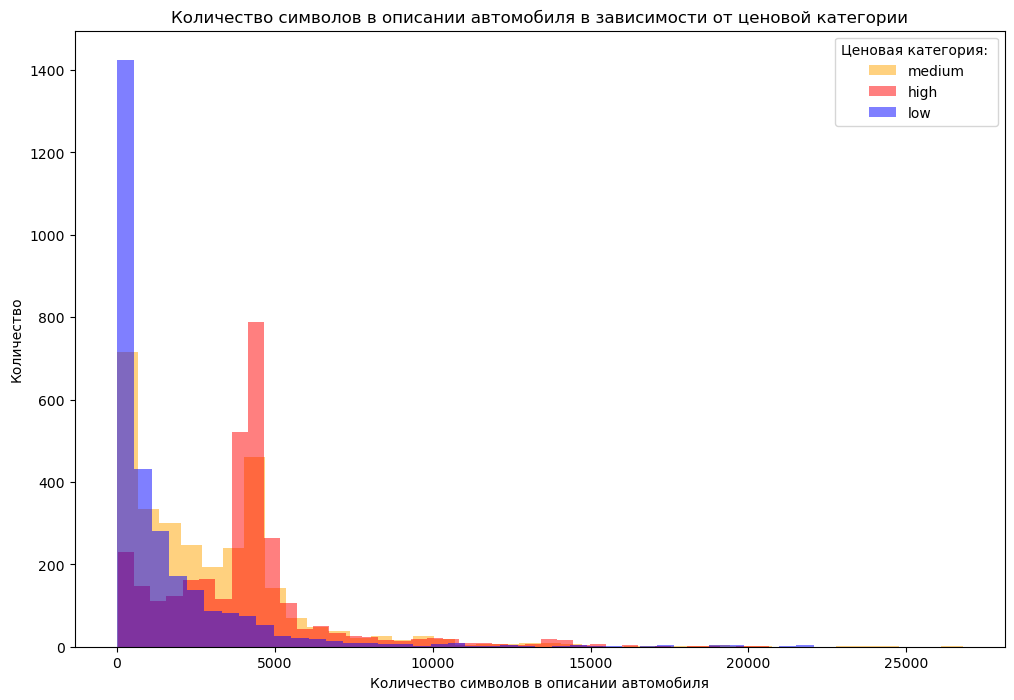

In [39]:
# Исследуем зависимость длины описания от ценовой категории
df_modern['desc_len'] = df_modern.apply(lambda x: len(x.description), axis=1)
create_hist(df_modern, 'desc_len', 'Количество символов в описании автомобиля', "Количество символов в описании автомобиля в зависимости от ценовой категории", 40)

Виднется зависимость между количеством символов и ценовой категорией, поэтому добавим это поле.

C:\Users\lorex\AppData\Local\Temp\ipykernel_19056\3265245804.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_modern['odometer/price'] = df_modern.apply(lambda x: x.odometer/x.price, axis=1)


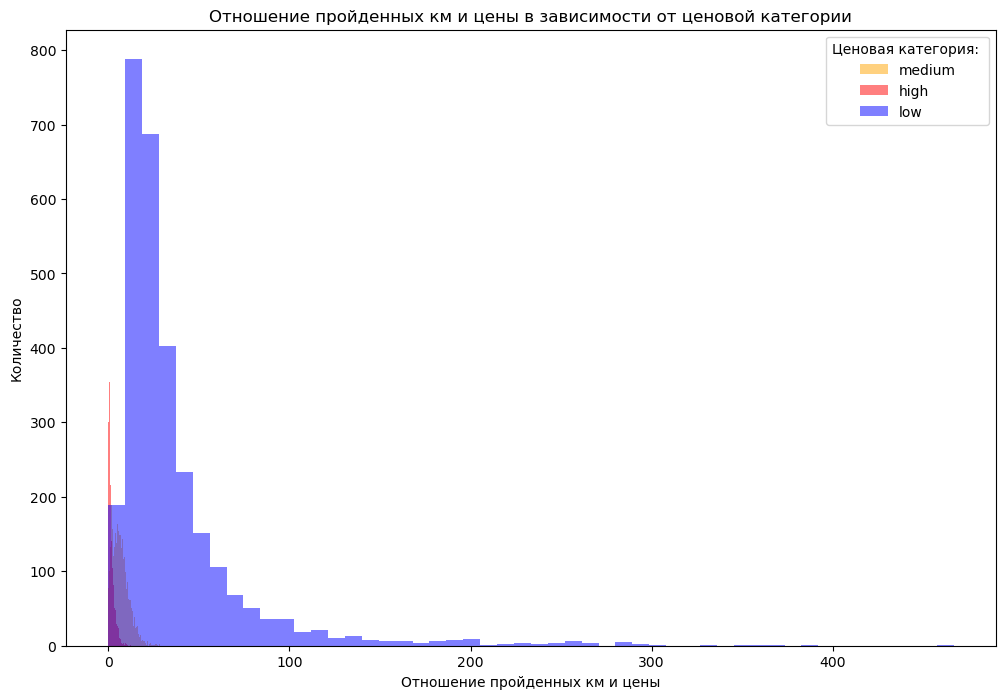

In [40]:
# Исследуем зависимость отношения пройденных км и цены относительно ценовой категории
df_modern['odometer/price'] = df_modern.apply(lambda x: x.odometer/x.price, axis=1)
create_hist(df_modern, 'odometer/price', "Отношение пройденных км и цены", "Отношение пройденных км и цены в зависимости от ценовой категории", 50)


Видна зависимость: чем больше отношение, тем хуже ценовая категория.

In [41]:
import datetime as dt
def get_year_month_day(x):
    return dt.datetime(x.year, x.month, 1)

def get_year(x):
    return x.year

def get_month(x):
    return x.month

def get_day(x):
    return x.day

In [42]:
df_modern['year_posting'] = df_modern['posting_date'].apply(get_year)
df_modern['moth_posting'] = df_modern['posting_date'].apply(get_month)
df_modern['day_posting'] = df_modern['posting_date'].apply(get_day)
df_modern['diff_year'] = df_modern.year_posting - df_modern.year

C:\Users\lorex\AppData\Local\Temp\ipykernel_19056\2486752191.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_modern['year_posting'] = df_modern['posting_date'].apply(get_year)
C:\Users\lorex\AppData\Local\Temp\ipykernel_19056\2486752191.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_modern['moth_posting'] = df_modern['posting_date'].apply(get_month)
C:\Users\lorex\AppData\Local\Temp\ipykernel_19056\2486752191.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

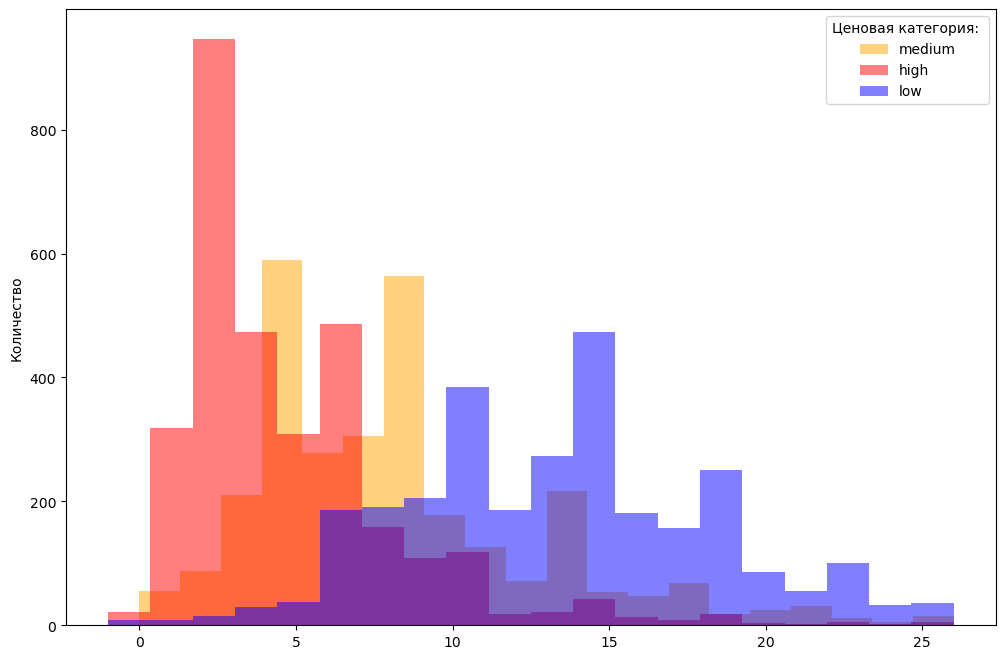

In [43]:
create_hist(df_modern, 'diff_year', "", '', 20)

### Нормализация данных.


In [44]:
from sklearn.preprocessing import StandardScaler
df_normal = df_modern.copy()

std_scaler = StandardScaler()

# Колонки, которые необходимо нормализовать
columns = ['diff_year', 'year_posting', 'day_posting', 'moth_posting', 'odometer/price', "desc_len", 'lat', 'long']
display(df_normal[columns].head())
columns_std = [i+"_std" for i in columns]
std_scaler.fit(df_normal[columns])
df_normal[columns_std] = std_scaler.transform(df_normal[columns])

,diff_year,year_posting,day_posting,moth_posting,odometer/price,desc_len,lat,long
0,1,2021,17,4,0.499036,4482,35.060000,-85.250000
1,5,2021,3,5,3.542852,968,40.821805,-74.061962
2,4,2021,28,4,0.394718,4286,33.779214,-84.411811
3,8,2021,17,4,8.089034,3241,35.715954,-78.655304
4,0,2021,3,5,0.366972,538,40.654800,-73.609700


### Удалим неинформативные столбцы.


In [45]:
columns = ['diff_year', 'year_posting', 'day_posting', 'moth_posting', 
           'odometer/price', "desc_len", 'lat', 'long', 'url', 'region', 
           'manufacturer', 'state', 'fuel', 'transmission', 'title_status',
           'region_url', 'date', 'posting_date', 'image_url','description', 
           "odometer", 'short_model', 'model', "year"]

df_after_drop = df_normal.drop(columns=columns)

4. *Modelling*

Объявите блок Modelling. В этом блоке:
* сформируйте датасет для обучения; инициализируйте фичи и целевую переменную
(`price_category`); положите их в соответствующие переменные;
* разделите данные на треин и тест;
* объявите три модели: логистическая регрессия, случайный лес и многослойный персептрон;
* поработайте с моделями: сделайте тюнинг параметров и выберите лучшую модель с помощью кросс-валидации на тренировочной выборке;
* по результатам кросс-валидации выберите лучшую модель;
* посчитайте значение метрики лучшей модели на тестовой выборке; убедитесь, что модель не переобучилась.

В решении данной задачи опирайтесь на результаты работы в 22-23 модулях блока Modelling. Исследование подкрепляйте соответствующей визуализацией в виде графиков, таблиц или матриц корреляций, если это нужно.

Декомпозируйте блок на подблоки, если это нужно.

### Обучение моделей.


In [46]:
df_pred = df_after_drop.drop(['odometer/price_std', 'price', 'id'], axis=1)
x = df_pred.drop(["price_category"], axis=1)
y = df_pred.price_category
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 


In [47]:
def print_score(y_test,  pred_log_test):
    score_test = accuracy_score(y_test, pred_log_test)
    print(f'Тестовая выборка = {score_test:.5f}')
    print(confusion_matrix(y_test, pred_log_test))
    
def predict_model(model, x_train, x_test):
    pred_log_train = model.predict(x_train)
    pred_log_test = model.predict(x_test)
    return pred_log_train, pred_log_test

#### Логистическая регрессия.

In [82]:

logreg = LogisticRegression(random_state=42, max_iter=300, C=0.2).fit(x_train, y_train)
pred_log_train, pred_log_test = predict_model(logreg, x_train, x_test)

print_score( y_test, pred_log_test)

Тестовая выборка = 0.75391
[[751  17 110]
 [ 25 720 140]
 [173 195 551]]


#### Случайный лес

In [76]:
rf = RandomForestClassifier(random_state=42, n_estimators=500).fit(x_train, y_train)
pred_log_train, pred_log_test = predict_model(rf, x_train, x_test)
print_score(y_test, pred_log_test)


Тестовая выборка = 0.75280
[[733  24 121]
 [ 23 745 117]
 [180 198 541]]


#### Многослойный персептрон

In [77]:
MLP = MLPClassifier(random_state=42, solver='adam', activation='tanh',max_iter=500).fit(x_train, y_train)
pred_log_train, pred_log_test = predict_model(MLP, x_train, x_test)
print_score(y_test, pred_log_test)

Тестовая выборка = 0.76174
[[739  11 128]
 [ 22 726 137]
 [127 214 578]]


#### Кросс-валидация.

In [83]:
for model, name in zip([logreg, rf, MLP], ["Логарифмическая регрессия", "Случайный лес", "Многослойный персептрон"]):
    cv_score = cross_val_score(model, x, y, cv=4)
    print(f"{name}: {cv_score.mean()}, {cv_score.std()}")
    

Логарифмическая регрессия: 0.7571879775445174, 0.00837553203056159
Случайный лес: 0.7626715154646815, 0.008117871908201709
Многослойный персептрон: 0.7666988618042496, 0.007310296638986065


Лучше всего показал себя многослойный персептрон.

In [84]:
pred_log_train, pred_log_test = predict_model(MLP, x_train, x_test)
print_score(y_test, pred_log_test)

Тестовая выборка = 0.76174
[[739  11 128]
 [ 22 726 137]
 [127 214 578]]


### 4. *Results*

Объявите блок Results. В этом блоке:

* подведите итог: какая модель показала себя лучше всего и будет финальным результатом данного ноутбука;
* обучите эту модель на всём датасете;
* сохраните обученную модель в `pickle`.

In [85]:
MLP = MLPClassifier(random_state=42, solver='adam', activation='tanh',max_iter=500).fit(x, y)
pred_log_train, pred_log_test = predict_model(MLP, x_train, x_test)
print_score(y_test, pred_log_test)


Тестовая выборка = 0.99963
[[878   0   0]
 [  0 885   0]
 [  1   0 918]]


In [86]:
filename = 'model.pickle'

with open(filename, 'wb') as file:
    pickle.dump(MLP, file)

## Как отправить работу на проверку


Отправьте куратору на проверку финальный ноутбук проекта, а также файл обученной модели в формате `pickle`.